In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.graphics.api import qqplot

In [3]:
# read data
df = pd.read_csv('Clean_Dataset.csv')
df = df.drop('Unnamed: 0', axis=1)
df.shape
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


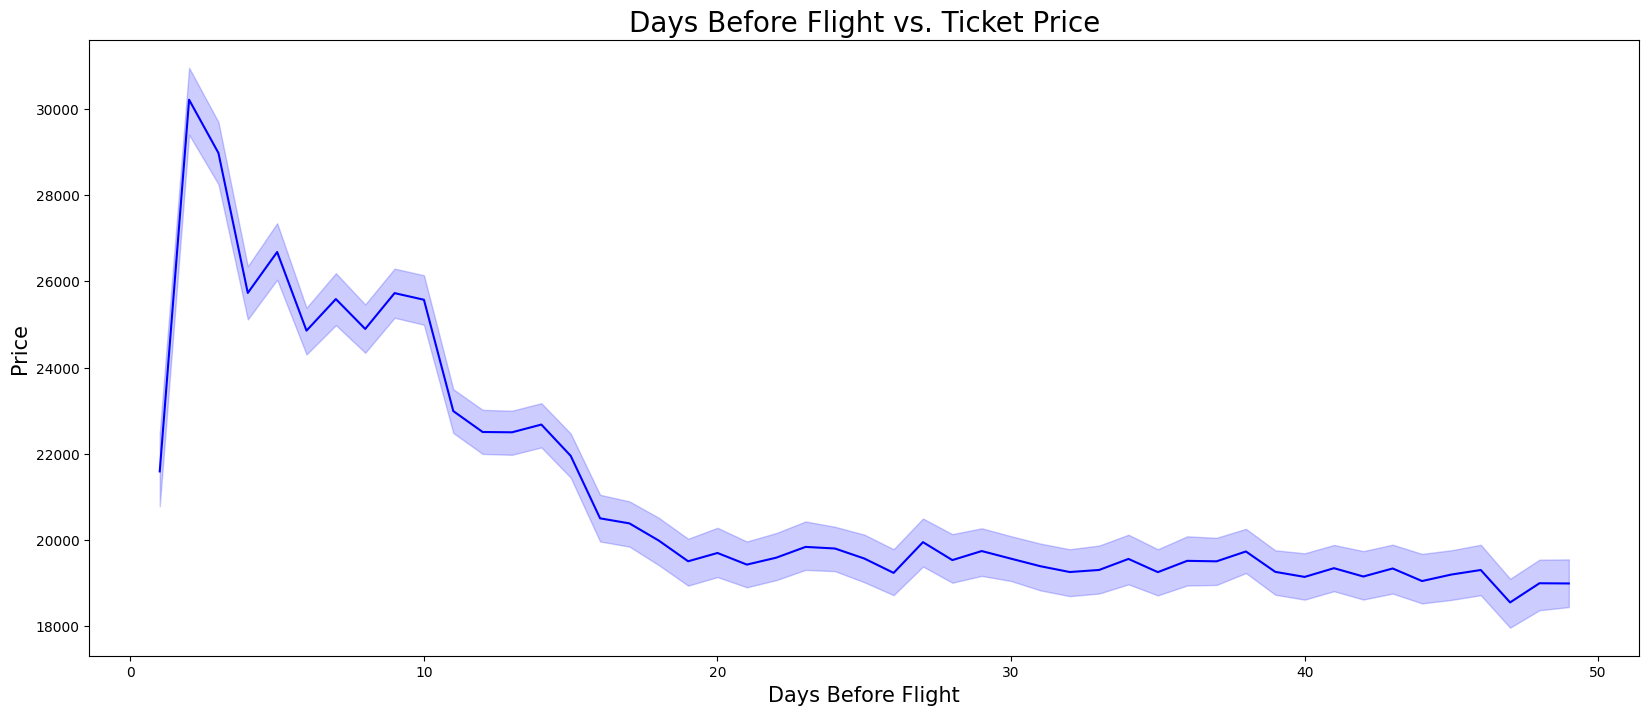

In [4]:
# plot data: all airlines
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='days_left', y='price', color='blue')
plt.title('Days Before Flight vs. Ticket Price', fontsize=20)
plt.xlabel('Days Before Flight', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [10]:
# create df: Delhi-Mumbai and Mumbai-Delhi
df_dm = df[((df['source_city'] == 'Delhi') & (df['destination_city'] == 'Mumbai')) | 
            ((df['source_city'] == 'Mumbai') & (df['destination_city'] == 'Delhi'))]
df_dm.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
# create df: Delhi-Bangalore and Bangalore-Delhi
df_db = df[(df['source_city'] == 'Delhi') & (df['destination_city'] == 'Bangalore') |
            ((df['source_city'] == 'Bangalore') & (df['destination_city'] == 'Delhi'))]
df_db.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
9982,SpiceJet,SG-191,Delhi,Early_Morning,zero,Morning,Bangalore,Economy,2.50,1,7425
9983,AirAsia,I5-1529,Delhi,Morning,zero,Afternoon,Bangalore,Economy,2.83,1,7426
9984,Vistara,UK-815,Delhi,Morning,zero,Morning,Bangalore,Economy,2.75,1,7425
9985,Vistara,UK-801,Delhi,Morning,zero,Morning,Bangalore,Economy,2.75,1,7425
9986,Vistara,UK-819,Delhi,Afternoon,zero,Evening,Bangalore,Economy,2.75,1,7425


In [12]:
# create df: Mumbai-Bangalore
df_mb = df[(df['source_city'] == 'Mumbai') & (df['destination_city'] == 'Bangalore') |
            ((df['source_city'] == 'Bangalore') & (df['destination_city'] == 'Mumbai'))]
df_mb.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
52828,GO_FIRST,G8-398,Mumbai,Night,zero,Night,Bangalore,Economy,1.58,1,5102
52829,Indigo,6E-5338,Mumbai,Morning,zero,Morning,Bangalore,Economy,1.58,1,5103
52830,Indigo,6E-5366,Mumbai,Morning,zero,Morning,Bangalore,Economy,1.83,1,5103
52831,Air_India,AI-639,Mumbai,Morning,zero,Morning,Bangalore,Economy,1.67,1,5103
52832,GO_FIRST,G8-351,Mumbai,Morning,one,Night,Bangalore,Economy,13.58,1,5102


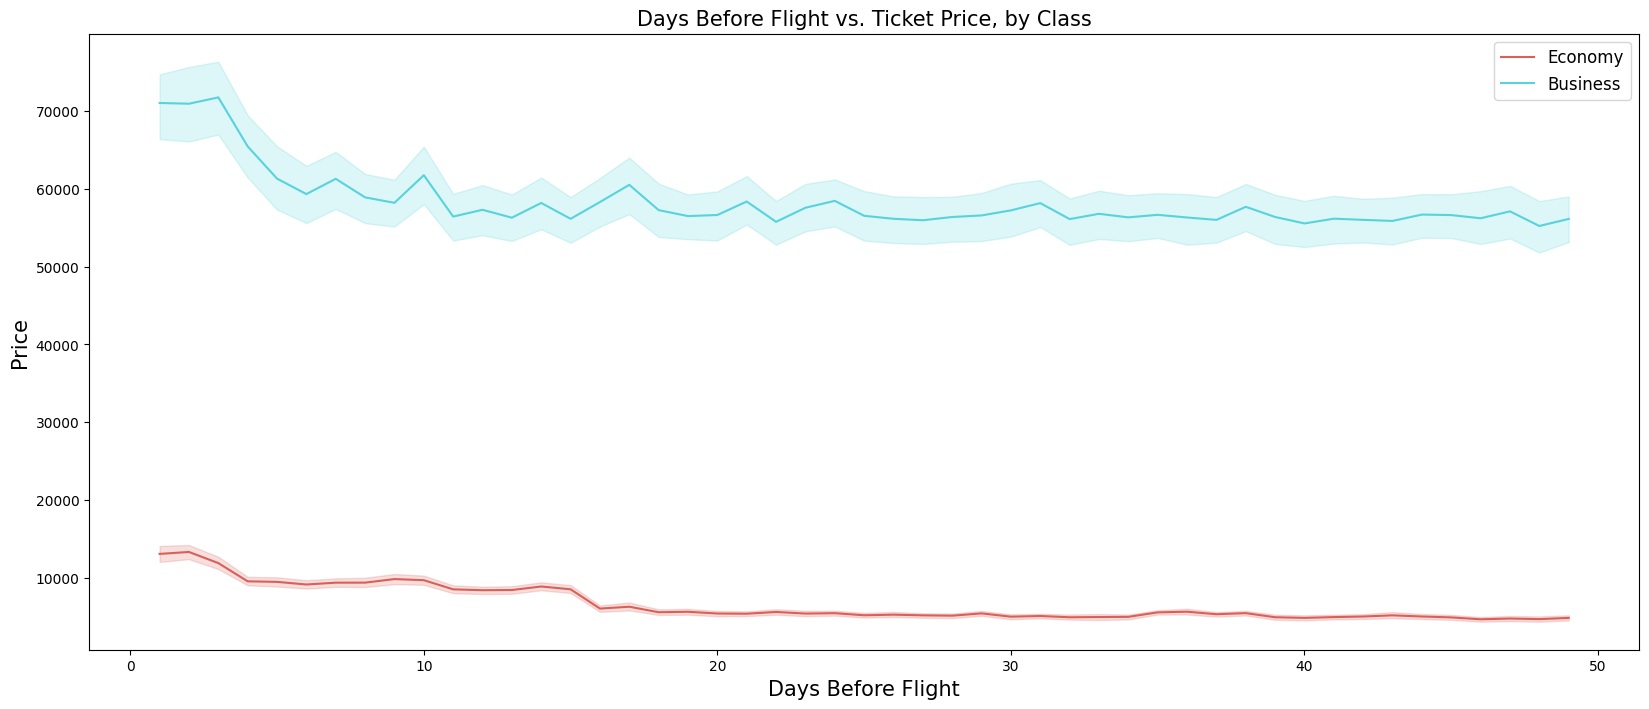

In [17]:
# Plot by class 
plt.figure(figsize=(20,8))
sns.lineplot(data=df_mb, x='days_left', y='price', color='blue', hue='class', palette='hls') # Update data for each df
plt.title('Days Before Flight vs. Ticket Price, by Class', fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Before Flight', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [19]:
# split based on class
df_dm_e = df_dm[df_dm['class'] == 'Economy']
df_dm_b = df_dm[df_dm['class'] == 'Business']

df_db_e = df_db[df_db['class'] == 'Economy']
df_db_b = df_db[df_db['class'] == 'Business']

df_mb_e = df_mb[df_mb['class'] == 'Economy']
df_mb_b = df_mb[df_mb['class'] == 'Business']

In [20]:
### Update this cell to run each airline ###

this_df = df_mb_e

In [21]:
# group by price, using averages
df_avg = this_df.groupby('days_left', as_index=False)['price'].mean()
df_avg.head()

,days_left,price
0,1,13073.443038
1,2,13321.343750
2,3,11891.541667
3,4,9548.068966
4,5,9479.006803


In [22]:
#### Method 1: Simple Moving Average ####

# N = 3
df_avg['SMA_3'] = df_avg.price.rolling(3, min_periods=1).mean()

# N = 5
df_avg['SMA_5'] = df_avg.price.rolling(5, min_periods=1).mean()

# N = 7
df_avg['SMA_7'] = df_avg.price.rolling(7, min_periods=1).mean()

# N = 10
df_avg['SMA_10'] = df_avg.price.rolling(10, min_periods=1).mean()

df_avg.head()

,days_left,price,SMA_3,SMA_5,SMA_7,SMA_10
0,1,13073.443038,13073.443038,13073.443038,13073.443038,13073.443038
1,2,13321.343750,13197.393394,13197.393394,13197.393394,13197.393394
2,3,11891.541667,12762.109485,12762.109485,12762.109485,12762.109485
3,4,9548.068966,11586.984794,11958.599355,11958.599355,11958.599355
4,5,9479.006803,10306.205812,11462.680845,11462.680845,11462.680845


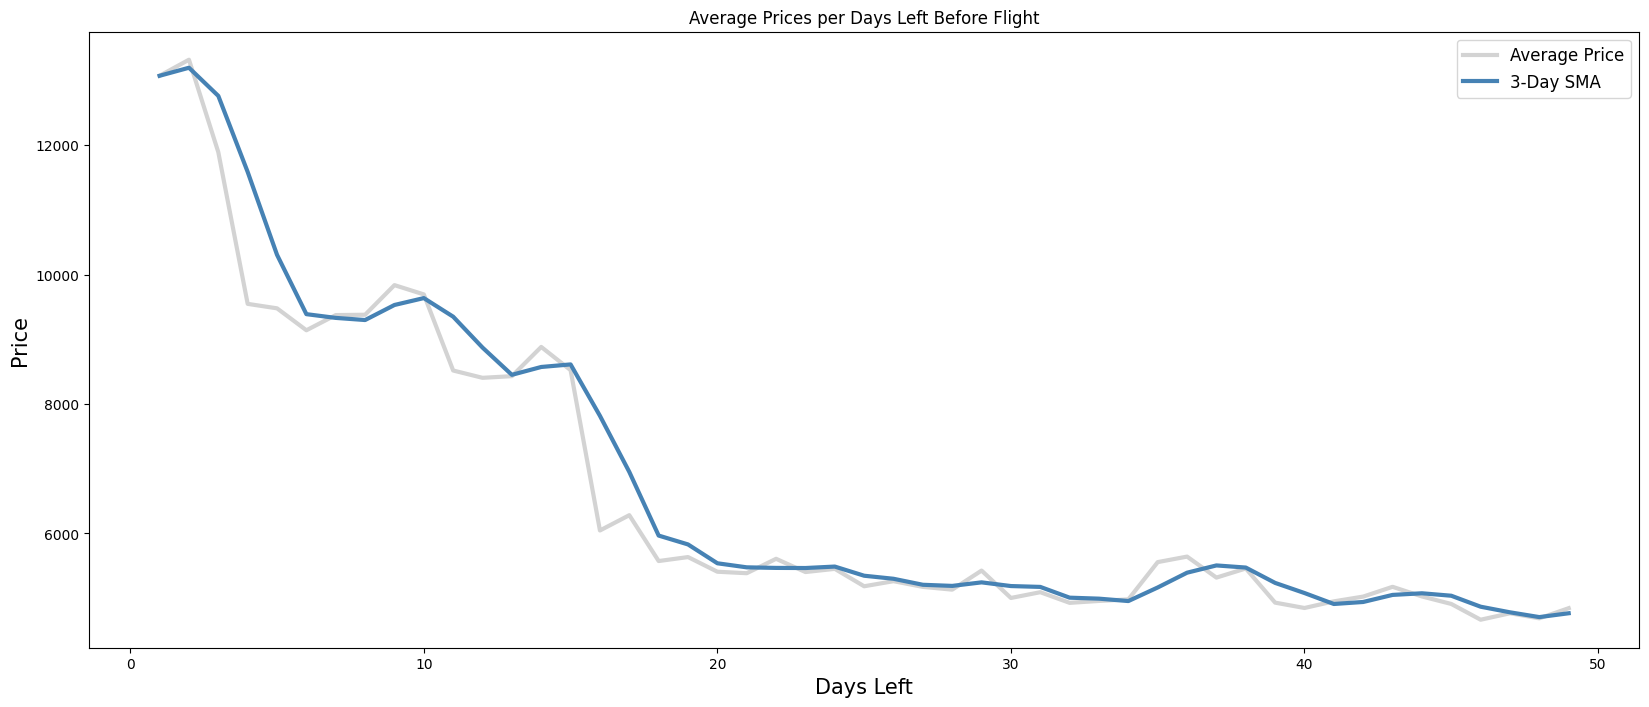

In [23]:
# 3-Day SMA Plot
colors = ['lightgray', 'steelblue']
df_avg.plot(x='days_left', y=['price', 'SMA_3'], color=colors, linewidth=3, figsize=(20,8))
plt.legend(labels=['Average Price', '3-Day SMA'], fontsize=12)
plt.title('Average Prices per Days Left Before Flight')
plt.xlabel('Days Left', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [ ]:
#### Method 2: Autoregressive Moving Average ####

